In [2]:
# generate partial dependence plots for OF

In [1]:
import os 
import pandas as pd, numpy as np

%matplotlib inline
import matplotlib.pyplot as plt

In [2]:
#  0.01% sample 
data = pd.read_csv("data/of_prediction_sample.csv") #https://querybuilder.uberinternal.com/r/sJd6k0RiZ/run/qstuXZ221/edit

In [3]:
data.shape, data.columns

((763953, 8),
 Index(['supply_type', 'adjustedeta', 'eyeball_eta', 'fd_eta', 'unadjusted_eta',
        'trip_distance_meter', 'trip_duration_sec', 'objective_value'],
       dtype='object'))

supply_type
adjustedeta
eyeball_eta
unadjusted_eta
trip_distance_meter
trip_duration_sec


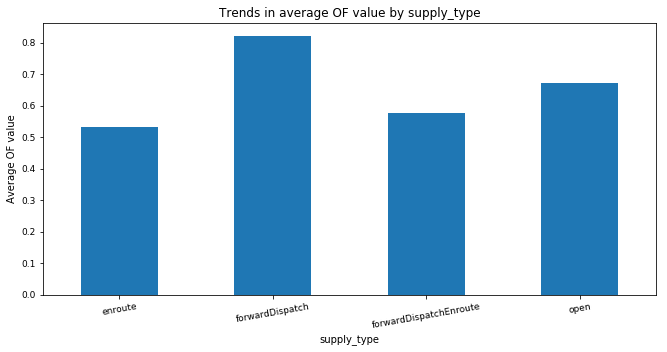

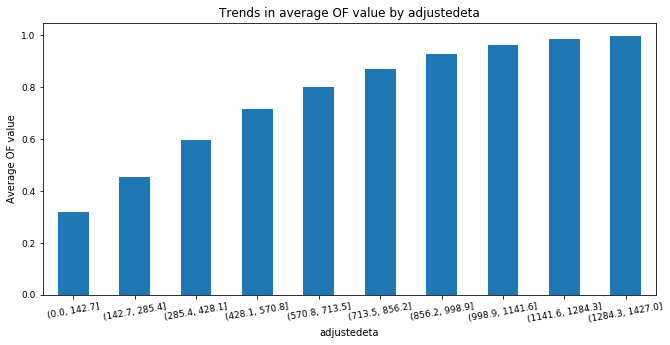

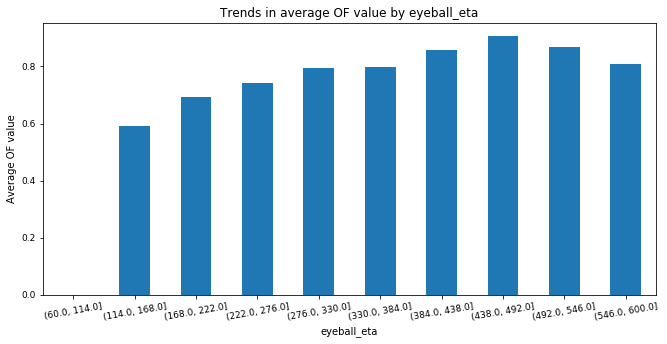

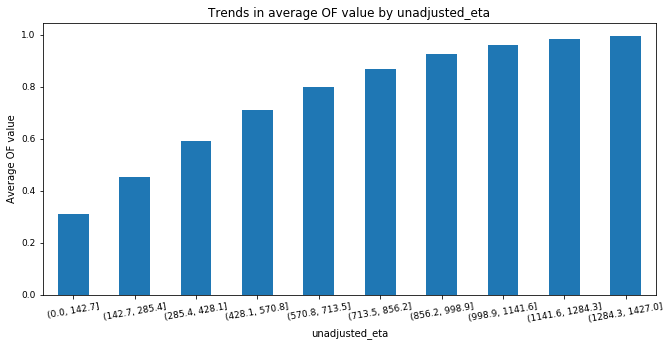

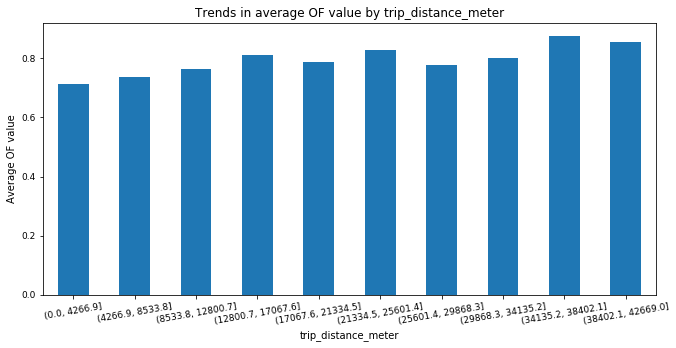

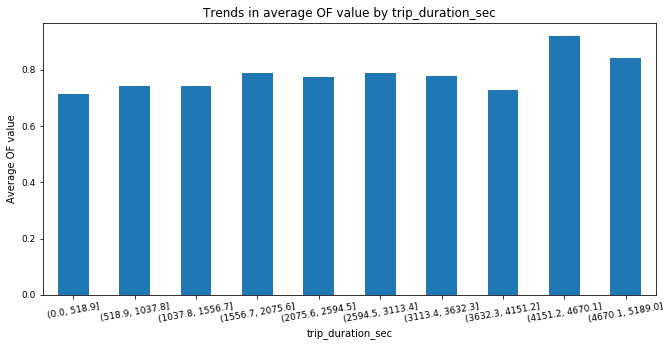

In [11]:
# create partial dependence plots
results_dir = "of_partial_dependence_results"
if not os.path.exists(results_dir):
    os.mkdir(results_dir)
    
# create bucketized dependence plots
for feature in ['supply_type', 'adjustedeta', 'eyeball_eta', 'unadjusted_eta',
        'trip_distance_meter', 'trip_duration_sec']:
    print(feature)

    fig = plt.figure(figsize=(11,5))
    try:
        if feature == 'supply_type':
            data.groupby(data[feature]).objective_value.mean().plot.bar(rot=10, fontsize=9)
        else:
            a = data[feature].min()
            b = data[feature].quantile(0.99) #max()
            data.groupby(pd.cut(data[feature], np.linspace(a,b,11))).objective_value.mean().plot.bar(rot=10, fontsize=9)
            
        
        plt.xlabel(feature)
        plt.ylabel('Average OF value')
        plt.title('Trends in average OF value by {}'.format(feature))
        plt.savefig(os.path.join(results_dir, "{}.pdf".format(feature)))
        #plt.show()
    except ValueError:
        pass